<a href="https://colab.research.google.com/github/FontanaDaniel1/Python/blob/main/Geo_Pandas_tutorial_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistemi di riferimento di coordinate**

# spiegazione teorica

Sistemi di riferimento di coordinate
Fino ad ora, abbiamo utilizzato i dati geometrici con determinate coordinate senza chiederci ulteriormente cosa significano quelle coordinate o come sono espresse.

Il sistema di riferimento delle coordinate (CRS) collega le coordinate a una posizione specifica sulla terra.

Per approfondimento https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

Coordinate geografiche
Gradi di latitudine e longitudine.

Per esempio. 48°51'N, 2°17'E

Il tipo di coordinate più conosciuto sono le coordinate geografiche: definiamo una posizione sul globo in gradi di latitudine e longitudine, rispetto all'equatore e al primo meridiano. Con questo sistema, possiamo facilmente specificare qualsiasi posizione sulla terra. È ampiamente utilizzato, ad esempio nel GPS. Se controlli le coordinate di una posizione in Google Maps, vedrai anche latitudine e longitudine.

Attenzione!

in Python usiamo (lon, lat) e non (lat, lon)

Longitudine: [-180, 180]{{1}}
Latitudine: [-90, 90]{{1}}
Coordinate proiettate
(x, y) le coordinate sono generalmente in metri o piedi

Nonostante la terra sia un globo, in pratica solitamente la rappresentiamo su una superficie piana: pensate ad una mappa fisica, o alle figure che abbiamo realizzato con Python sullo schermo del nostro computer. Passare dal globo a una mappa piatta è ciò che chiamiamo una proiezione.

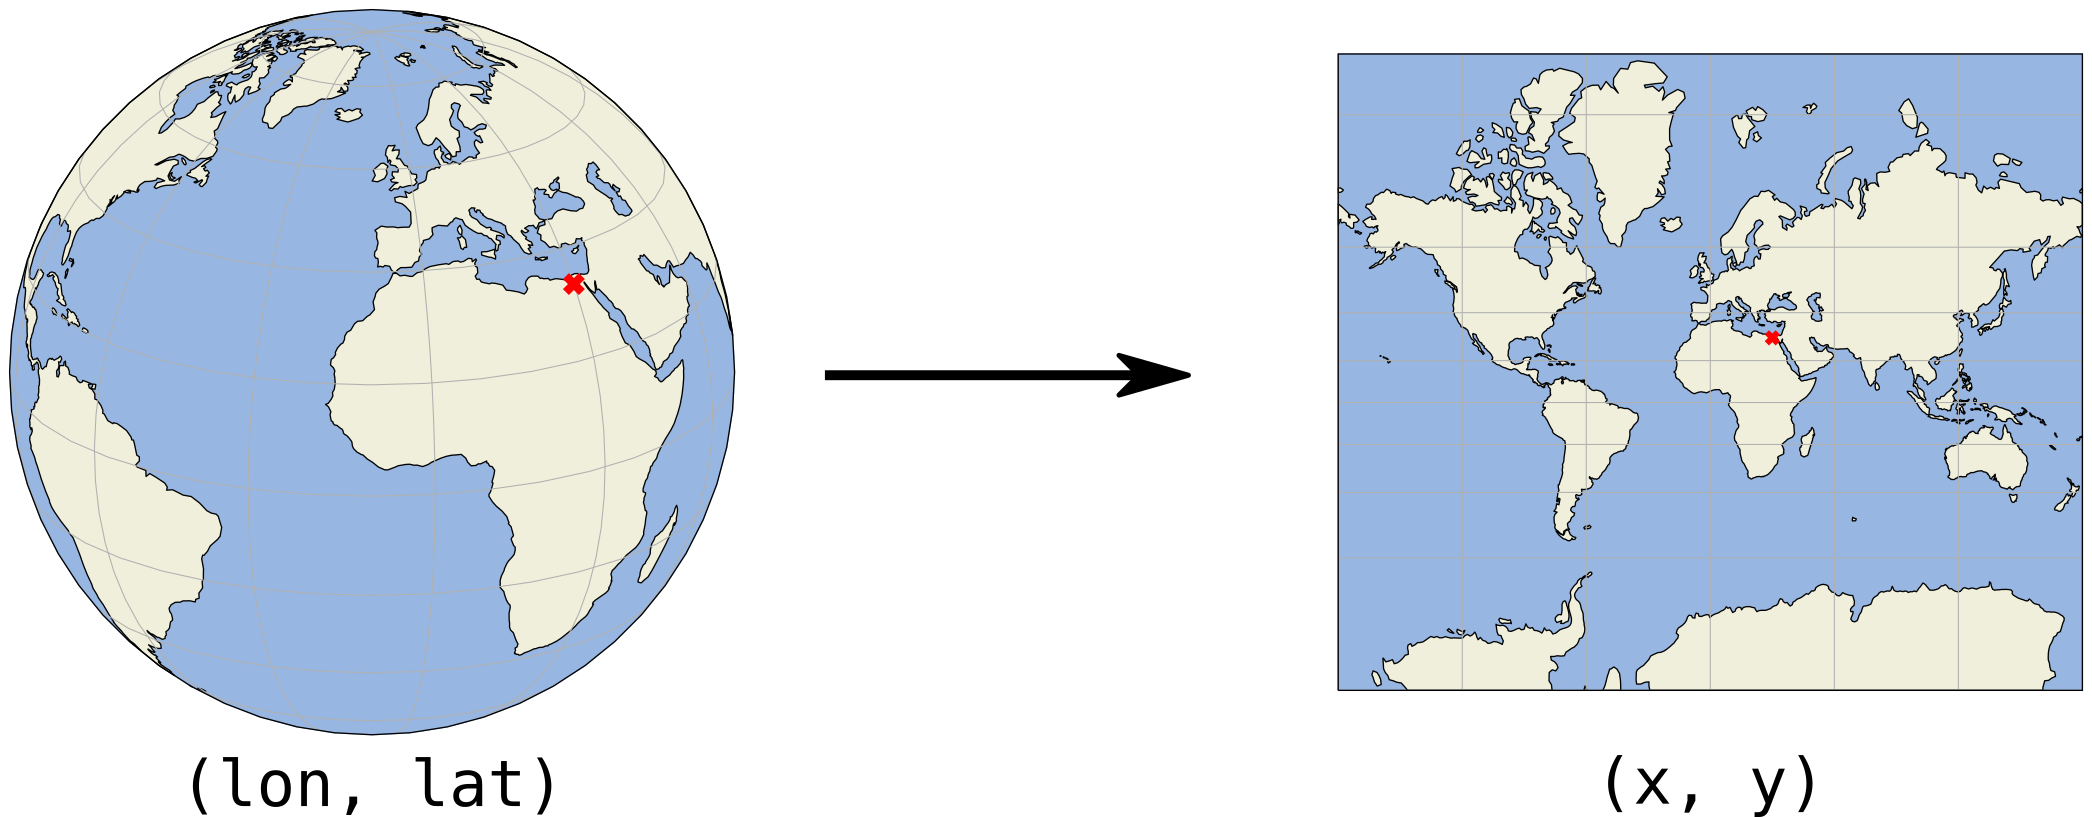

Proiettiamo la superficie della terra su un piano 2D in modo da poter esprimere le posizioni in coordinate cartesiane x e y, su una superficie piana. In questo piano, in genere lavoriamo con un'unità di lunghezza come i metri anziché i gradi, il che rende l'analisi più comoda ed efficace.

Tuttavia, c'è un'osservazione importante: la terra tridimensionale non può mai essere rappresentata perfettamente su una mappa bidimensionale, quindi le proiezioni introducono inevitabilmente delle distorsioni. Per ridurre al minimo tali errori, esistono diversi approcci al progetto, ciascuno con vantaggi e svantaggi specifici.

Alcuni sistemi di proiezione cercheranno di preservare la dimensione dell'area delle geometrie, come la proiezione Albers Equal Area. Altri sistemi di proiezione cercano di preservare gli angoli, come la proiezione di Mercatore, ma vedranno grandi distorsioni nell'area. Ogni sistema di proiezione avrà sempre una certa distorsione di area, angolo o distanza.

# codice

In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
countries = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
cities = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")
rivers = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")

Sistemi di riferimento di coordinate in Python / GeoPanda
Un GeoDataFrame o GeoSeries ha un .crs attributo che contiene (facoltativamente) una descrizione del sistema di riferimento delle coordinate delle geometrie:

In [ ]:
countries.crs #? #ti da il numero EPSG 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

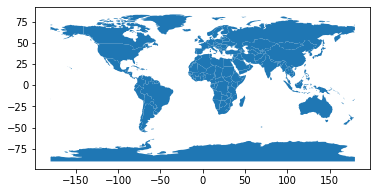

In [ ]:
countries.plot() #disegna fiumi, città basandosi sulla cartina di tutto il mondo

L'attributo .crs restituisce un oggetto pyproj.CRS. Per specificare un SR, in genere utilizziamo una rappresentazione di stringa:

codice EPSG

Esempio: EPSG:4326 = WGS84 CRS geografico (longitudine, latitudine)

Rappresentazione Well-Know-Text (WKT).

Nei software e nei set di dati meno recenti, potresti anche incontrare una rappresentazione "stringa proj4":

Esempio: +proj=longlat +datum=WGS84 +no_defs

Tuttavia, questo non è più raccomandato.

Vedi ad esempio https://epsg.io/4326

Sotto il cofano, GeoPandas utilizza le librerie pyproj / PROJ per gestire le riproiezioni.

Per ulteriori informazioni, vedere anche http://geopandas.readthedocs.io/en/latest/projections.html.

Trasformazione in un altro CRS
Possiamo convertire un GeoDataFrame in un altro sistema di riferimento utilizzando la funzione to_crs.

Ad esempio, convertiamo i paesi nella proiezione World Mercator (http://epsg.io/3395):

In [ ]:
countries = countries[(countries['name'] != "Antarctica")] #rimuovere l antartide tramite nome

In [ ]:
countries_mercator = countries.to_crs(epsg=3395) #rimuovere l antartide tramite coordinate

In [ ]:
countries_mercator.plot()

Perché utilizzare un CRS diverso?
A volte ci sono buoni motivi per cui vuoi cambiare il sistema di riferimento delle coordinate del tuo set di dati, ad esempio:

Fonti diverse con CRS diversi -> devono essere convertite nello stesso CRS

df1 = geopandas.read_file(...)
df2 = geopandas.read_file(...)

df2 = df2.to_crs(df1.crs)
Mappatura (distorsione della forma e delle distanze)

Calcoli basati su distanza/area -> assicurarsi di utilizzare un sistema di coordinate proiettato appropriato espresso in un'unità significativa come metri o piedi (non gradi).

# Lets Practise

Fino ad ora, abbiamo fornito i set di dati in un apposito CRS progettato per gli esercizi. Ma i dati originali utilizzavano in realtà coordinate geografiche. Nei seguenti esercizi inizieremo da lì.

Tornando al set di dati dei distretti di Parigi, ora viene fornito come file GeoJSON ("data/paris_districts.geojson") in coordinate geografiche.

Per la conversione in coordinate proiettate, utilizzeremo il CRS proiettato standard per la Francia è il sistema di riferimento RGF93 / Lambert-93, a cui fa riferimento il numero EPSG:2154 (in Belgio questo sarebbe Lambert 72, EPSG:31370).

ESERCIZIO 1: Progettazione di un GeoDataFrame

* Leggere i set di dati dei distretti ("data/paris_districts.geojson") in un é
* GeoDataFrame chiamato districts.
* Guarda l'attributo CRS del GeoDataFrame. Riconosci il numero EPSG?
* Crea un grafico del set di dati dei distretti.
* Calcola l'area di tutti i quartieri.
* Convertire i distretti in un CRS proiettato (utilizzando l'EPSG:2154 per la Francia). Chiama il nuovo set di dati districts_RGF93.
* Crea una mappa simile di districts_RGF93.
* Calcolare nuovamente l'area di tutti i quartieri con districts_RGF93 (il risultato sarà ora espresso in m²).

Suggerimenti

*   Le informazioni CRS vengono archiviate nell'attributo .crs di un GeoDataFrame.
*   Creare un semplice grafico di un GeoDataFrame può essere fatto con il metodo .plot().
* La conversione in un SR diverso può essere eseguita con il metodo .to_crs() e il SR può essere specificato come numero EPSG utilizzando la parola chiave epsg.




In [ ]:
#punto 1
geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/raw/main/data/paris_districts.geojson")

In [ ]:
#punto 2
districts = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/raw/main/data/paris_districts.geojson")

In [ ]:
#punto 3
districts.crs
#??

In [ ]:
#punto 4
districts.plot()

In [ ]:
#punto 5
districts.geometry.area # calcola l area di tutti i distretti

In [ ]:
#punto 6
#conversione dei distretti in dati EPSG
districts_RGF93 = districts.to_crs(epsg=2154) #epsg dato dall esercizio 
districts_RGF93
#??
#cosa succese in districts_RGF93?

In [ ]:
#punto 7
districts_RGF93.plot()

In [ ]:
#punto 8
districts_RGF93.geometry.area #calcolo dell area in km²

ESERCIZIO 2:

Nel taccuino precedente, abbiamo svolto un esercizio sulla rappresentazione grafica delle posizioni delle stazioni ciclabili a Parigi e sull'aggiunta di una mappa di sfondo utilizzando il pacchetto contextily.

Attualmente, contextily presuppone che i tuoi dati si trovino nella proiezione Web Mercator, il sistema utilizzato dalla maggior parte dei servizi di tessere web. E in quel primo esercizio, abbiamo fornito i dati nel CRS appropriato, quindi non dovevi preoccuparti di questo aspetto.

Tuttavia, in genere, i tuoi dati non arriveranno in Web Mercator (EPSG:3857) e dovrai allinearli con i riquadri web da solo.

* Leggi i set di dati delle stazioni per biciclette ("data/paris_bike_stations.geojson") in un GeoDataFrame chiamato stazioni.
* Convertire il set di dati delle stazioni nella proiezione Web Mercator (EPSG:3857). Chiama il risultato stazioni_webmercator e ispeziona il risultato.
* Crea un grafico di questo set di dati proiettato (specifica la dimensione del marcatore su 5) e aggiungi una mappa di sfondo usando contestualmente.

Suggerimenti

* Creare un semplice grafico di un GeoDataFrame può essere fatto con il metodo .plot(). Questo restituisce un oggetto assi matplotlib.
* La dimensione del marcatore può essere specificata con la parola chiave markersize se il metodo .plot().
* Per aggiungere una mappa di sfondo, usa la funzione contextily.add_basemap(). Prende l'ascia matplotlib a cui aggiungere una mappa come primo argomento.

In [ ]:
#punto 1
stations = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/raw/main/data/paris_bike_stations.geojson")
stations

In [ ]:
#punto 2
stations_webmercator = stations.to_crs("EPSG:3857") #convertire alla proiezione Web Mercator
stations_webmercator
#??

In [ ]:
!pip install contextily

In [ ]:
#punto 3
import contextily
ax = stations_webmercator.plot(markersize=5) #dimensione del marcatore
contextily.add_basemap(ax) #aggiunge un grafico 